In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylabplot as plt

In [2]:
df =  pd.read_csv('Case.csv', index_col= False)

In [20]:
df.head()                    

,Ref,Credit_Score,Final_Grade,Term,Net_Advance,APR,Loan_Type,Mosaic,Mosaic_Class,Time_at_Address,...,CIFAS_detected,Time_since_most_recent_outstandi,Insurance_Description,PPI,code,prdt_desc,category,PPI_SINGLE,PPI_JOINT,PPI_LCI
0,1,918,A,36,3000.0,14.4,UnSecured,46,8,132,...,N,16,NaN,0,NaN,NaN,NaN,0,0,0
1,3,903,A,120,21000.0,7.9,secured,16,3,288,...,N,99,Life & Critical Illn,1,748.0,LIFE & CRITICAL ILLNESS,LCI,0,0,1
2,4,1060,X,78,7200.0,7.9,secured,17,3,276,...,N,50,Joint,1,719.0,LASCI JOINT,Joint,0,1,0
3,6,839,B,60,8000.0,16.9,UnSecured,47,8,48,...,N,99,Life & Critical Illn,1,748.0,LIFE & CRITICAL ILLNESS,LCI,0,0,1
4,7,1057,X,60,7650.0,7.4,UnSecured,55,10,156,...,N,99,Single,1,718.0,LASCI,Single,1,0,0


In [21]:
df.columns

Index(['Ref', 'Credit_Score', 'Final_Grade', 'Term', 'Net_Advance', 'APR',
       'Loan_Type', 'Mosaic', 'Mosaic_Class', 'Time_at_Address',
       'Residential_Status', 'Telephone_Indicator', 'Number_of_Dependants',
       'Marital_Status', 'Gender', 'Time_in_Employment', 'Employment_Status',
       'Full_Part_Time_Empl_Ind', 'Perm_Temp_Empl_Ind', 'Income_Range',
       'Current_Account', 'ACCESS_Card', 'VISA_Card', 'American_Express',
       'Diners_Card', 'Cheque_Guarantee', 'Other_Credit_Store_Card',
       'Time_with_Bank', 'Value_of_Property', 'Outstanding_Mortgage_Bal',
       'Total_Outstanding_Balances', 'Bureau_Data___Monthly_Other_Co_R',
       'Worst_History_CT', 'Payment_Method', 'Age',
       'Total_outstanding_balance__mortg', 'Total___Public_Info___CCJ____ban',
       'Total_value__Public_Info___CCJ__', 'Time_since_most_recent_Public_In',
       'Total_value__CAIS_8_9s', 'Worst_status_L6m', 'Worst_CUrrent_Status',
       '__of_status_3_s_L6m', 'Searches___Total___L6m', '

In [22]:
df.rename(columns= {'Bureau_Data___Monthly_Other_Co_R' : 'BureauData_MonthlyOther_CoR', 'Total_outstanding_balance__mortg' : 
                   'TotalOutstanding_balance_mortg', 'Total___Public_Info___CCJ____ban':'TotalPublic_Info_CCJ_ban', 'Total_value__Public_Info___CCJ__'
                   : 'TotalValue_Public_Info_CCJ', 'Total_value__CAIS_8_9s' : 'Total_value_CAIS_8_9s', 'Worst_CUrrent_Status' :
                   'Worst_Current_Status', '__of_status_3_s_L6m':'Status_3s_L6m', 'Searches___Total___L6m':'SearchesTotal_L6m',
                   'Bankruptcy_Detected__SP_' :'BankruptcyDetected_SP', 'Total___outstanding_CCJ_s':'TotalOutstanding_CCJs',
                   'Total_outstanding_balance___excl': 'TotalOutstandingBalance_excl', 'Total___of_accounts': 'TotalOf_accounts',
                   'Time_since_most_recent_outstandi' : 'TimeSinceMost_recent_outstanding' }, inplace= True)

In [40]:
df.head()

,Ref,Credit_Score,Final_Grade,Term,Net_Advance,APR,Loan_Type,Mosaic,Mosaic_Class,Time_at_Address,...,CIFAS_detected,TimeSinceMost_recent_outstanding,Insurance_Description,PPI,code,prdt_desc,category,PPI_SINGLE,PPI_JOINT,PPI_LCI
0,1,918,A,36,3000.0,14.4,UnSecured,46,8,132,...,N,16,NaN,0,NaN,NaN,NaN,0,0,0
1,3,903,A,120,21000.0,7.9,secured,16,3,288,...,N,99,Life & Critical Illn,1,748.0,LIFE & CRITICAL ILLNESS,LCI,0,0,1
2,4,1060,X,78,7200.0,7.9,secured,17,3,276,...,N,50,Joint,1,719.0,LASCI JOINT,Joint,0,1,0
3,6,839,B,60,8000.0,16.9,UnSecured,47,8,48,...,N,99,Life & Critical Illn,1,748.0,LIFE & CRITICAL ILLNESS,LCI,0,0,1
4,7,1057,X,60,7650.0,7.4,UnSecured,55,10,156,...,N,99,Single,1,718.0,LASCI,Single,1,0,0


In [50]:
#df.drop(['Insurance_Description'], axis=1, inplace= True)

In [54]:
#df.drop(['prdt_desc'], axis=1, inplace= True)

In [67]:
df.isnull().sum()                     

Ref                                    0
Credit_Score                           0
Final_Grade                            0
Term                                   0
Net_Advance                            0
APR                                    0
Loan_Type                              0
Mosaic                                 0
Mosaic_Class                           0
Time_at_Address                        0
Residential_Status                     0
Telephone_Indicator                    0
Number_of_Dependants                   0
Marital_Status                         0
Gender                                 0
Time_in_Employment                     0
Employment_Status                      0
Full_Part_Time_Empl_Ind                0
Perm_Temp_Empl_Ind                     0
Income_Range                           0
Current_Account                        0
ACCESS_Card                            0
VISA_Card                              0
American_Express                       0
Diners_Card     

In [73]:
df['code'].fillna(value=df['code'].mean(), inplace= True)

In [81]:
#miss_categ = [var for var in df.columns if df[var].isnull().mean()>0 &  df[var].dtype == '0']

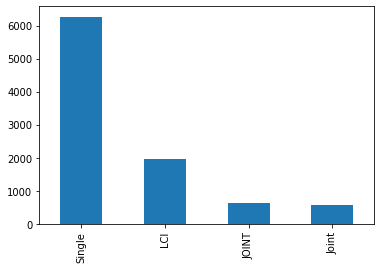

In [80]:
df['category'].value_counts().plot.bar()

In [82]:
df['category'].mode()

0    Single
dtype: object

In [85]:
df['category'].fillna('Single', inplace= True)

In [86]:
df.isnull().sum()

Ref                                 0
Credit_Score                        0
Final_Grade                         0
Term                                0
Net_Advance                         0
APR                                 0
Loan_Type                           0
Mosaic                              0
Mosaic_Class                        0
Time_at_Address                     0
Residential_Status                  0
Telephone_Indicator                 0
Number_of_Dependants                0
Marital_Status                      0
Gender                              0
Time_in_Employment                  0
Employment_Status                   0
Full_Part_Time_Empl_Ind             0
Perm_Temp_Empl_Ind                  0
Income_Range                        0
Current_Account                     0
ACCESS_Card                         0
VISA_Card                           0
American_Express                    0
Diners_Card                         0
Cheque_Guarantee                    0
Other_Credit

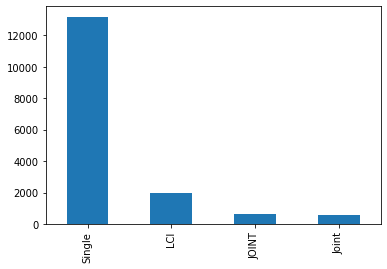

In [87]:
df['category'].value_counts().plot.bar()

In [89]:
df.head()

,Ref,Credit_Score,Final_Grade,Term,Net_Advance,APR,Loan_Type,Mosaic,Mosaic_Class,Time_at_Address,...,TotalOutstandingBalance_excl,TotalOf_accounts,CIFAS_detected,TimeSinceMost_recent_outstanding,PPI,code,category,PPI_SINGLE,PPI_JOINT,PPI_LCI
0,1,918,A,36,3000.0,14.4,UnSecured,46,8,132,...,18,6,N,16,0,743.303243,Single,0,0,0
1,3,903,A,120,21000.0,7.9,secured,16,3,288,...,203,8,N,99,1,748.000000,LCI,0,0,1
2,4,1060,X,78,7200.0,7.9,secured,17,3,276,...,87,7,N,50,1,719.000000,Joint,0,1,0
3,6,839,B,60,8000.0,16.9,UnSecured,47,8,48,...,229,9,N,99,1,748.000000,LCI,0,0,1
4,7,1057,X,60,7650.0,7.4,UnSecured,55,10,156,...,38,6,N,99,1,718.000000,Single,1,0,0


In [90]:
df.drop('Ref', axis = 1, inplace= True)

In [111]:
df.head()

,Credit_Score,Final_Grade,Term,Net_Advance,APR,Loan_Type,Mosaic,Mosaic_Class,Time_at_Address,Residential_Status,...,TotalOutstandingBalance_excl,TotalOf_accounts,CIFAS_detected,TimeSinceMost_recent_outstanding,PPI,code,category,PPI_SINGLE,PPI_JOINT,PPI_LCI
0,918,A,36,3000.0,14.4,UnSecured,46,8,132,H,...,18,6,N,16,0,743.303243,Single,0,0,0
1,903,A,120,21000.0,7.9,secured,16,3,288,H,...,203,8,N,99,1,748.000000,LCI,0,0,1
2,1060,X,78,7200.0,7.9,secured,17,3,276,H,...,87,7,N,50,1,719.000000,Joint,0,1,0
3,839,B,60,8000.0,16.9,UnSecured,47,8,48,R,...,229,9,N,99,1,748.000000,LCI,0,0,1
4,1057,X,60,7650.0,7.4,UnSecured,55,10,156,H,...,38,6,N,99,1,718.000000,Single,1,0,0


In [107]:
#df[cols] = df[cols].astype('category')